# Fuzzy Reconstruction with Entropy

Require:  
The set of points $\left\{p_1, p_2, ..., p_n \right\}$;
The reconstruction point $x$;  
Setting the weight decay parameter $\alpha$;  
Setting the sum of absolute error $\delta$;

In [2]:
%matplotlib inline

import matplotlib
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from scipy import optimize
import numpy as np
import  matplotlib.pyplot as plt 
import matplotlib.colors as colors
import time
colors_ = np.array(colors.cnames.keys())

matplotlib.rcParams['figure.figsize'] = (26, 26)
samples = 5
np.random.seed(5)
# P = np.random.random_sample([1,samples])
P = np.array([[0.1],[0.3],[0.5],[0.7],[0.9]]).T

## don't update P

In [54]:
def frwe(x, P, alpha=0.1, delta=1e-5, max_times=1000):
    dim = P.shape[1]
    i=0
    w0 = np.random.rand(1, dim)
    w=np.zeros((max_times, dim))
    w[0,:] = w0
    temp = np.dot(P.T,P).T+np.dot(P.T,P)
    while True:
        i+=1
        w[i,:] = np.exp((np.dot(2*x.T,P)-np.dot(w0,temp))/alpha)/\
            np.sum(np.exp((np.dot(2*x.T,P)-np.dot(w0,temp))/alpha))
        w0=w[i,:].reshape(1, dim)
        # weight movement
#         if np.sum(np.abs(w[i,:]-w[i-1,:]))<delta:
#             break
        
        res = np.linalg.norm(x-np.dot(P,w0.T))
        entropy = np.sum(w0*np.log(w0))
        # object function movement
        if res+alpha*entropy < delta:
            break

        
        if i>max_times-2:
            break
#     print i   
    return w[0:i,:]
        

## update P

In [192]:
def frwep(x, P, alpha=0.1, delta=1e-5, max_times=100):
    dim = P.shape[1]
    i=0
    j=0
    w0 = np.random.rand(1, dim)
    w0 = np.random.rand(1, dim)
    w=np.zeros((1, dim))
    w[0,:] = w0
    while True:
        j+=1
        temp = np.dot(P.T,P).T+np.dot(P.T,P)
        while True:
            i+=1
            w = np.exp((np.dot(2*x.T,P)-np.dot(w0,temp))/alpha)/\
                np.sum(np.exp((np.dot(2*x.T,P)-np.dot(w0,temp))/alpha))
            # weight movement
            if np.sum(np.abs(w-w0))<delta:
                break
            w0=w
            if i>max_times-2:
                break
                # object function movement
        P = np.dot(x,np.linalg.pinv(w.T))
        res = np.linalg.norm(x-np.dot(P,w.T))
        entropy = np.sum(w*np.log(w))   
        if res+alpha*entropy < delta:
            break
        if j>max_times-2:
            break
    return w,p
        

In [50]:
x_samples = 100
X = np.linspace(0,1,x_samples)
result = [frwe(np.reshape(tem,(1,1)),P) for tem in X]
lastw = np.array([tem[-1,:] for tem in result])

999
999
999
999
999
999
999
999
999
3
1
3
1
1
3
1
3
3
3
3
5
5
999
999
999
999
999
999
999
999
999
999
1
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
1
999
999
1
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
999
2
6
6
1
4
4
4
4
4
2
2
2
2
2
999
999
999
999
999
999
999
999
999


In [151]:
res = [np.linalg.norm(np.reshape(X[tem],(1,1))-np.dot(P,result[tem][-1,:].T)) for tem in range(0,len(result))]
entropy = [np.sum(result[tem][-1,:].T*np.log(result[tem][-1,:].T)) for tem in range(0,len(result))]

ValueError: total size of new array must be unchanged

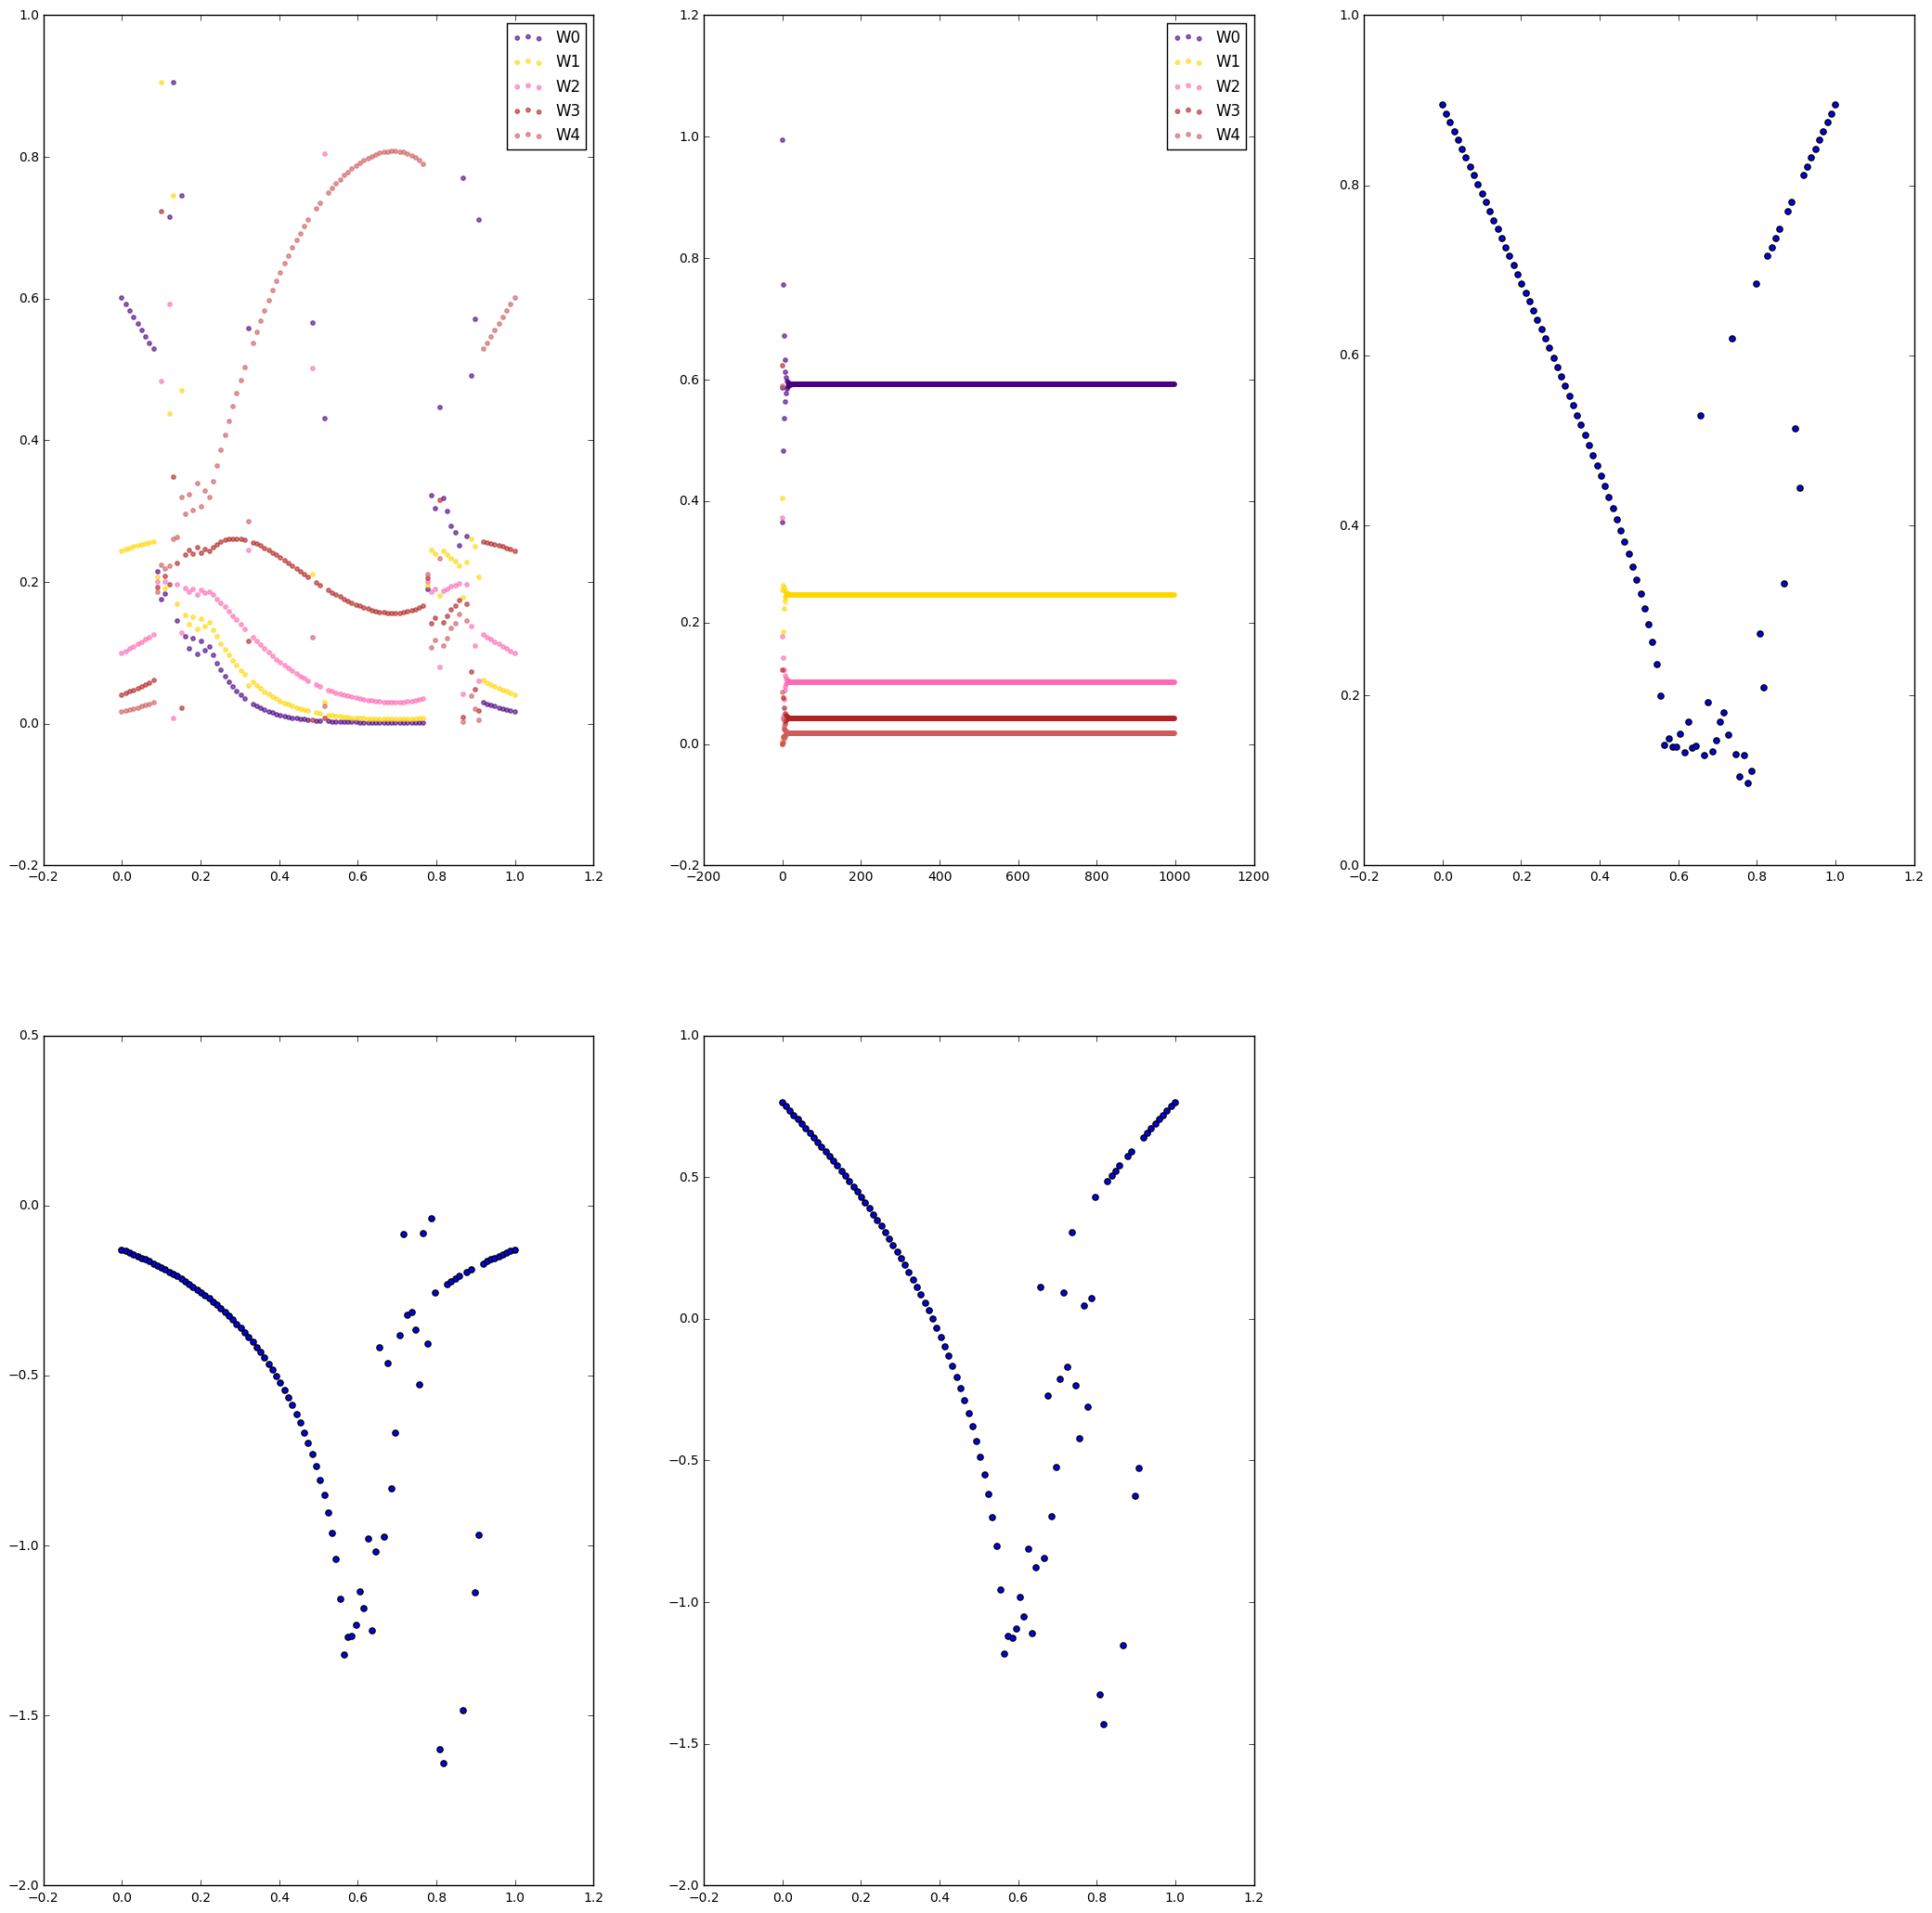

In [51]:
plt.subplot(231)
s=[]
for i in range(0,samples):
    s.append(plt.scatter(X, lastw[:,i],color=colors_[i],alpha=0.6,s=10))
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.subplot(232)
s=[]
for i in range(0,samples):
    s.append(plt.scatter(range(0,len(result[1][:,i])), result[1][:,i],color=colors_[i],alpha=0.6,s=10))
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.subplot(233)
plt.scatter(X,res)
plt.subplot(234)
plt.scatter(X,entropy)
plt.subplot(235)
plt.scatter(X,np.array(entropy)+np.array(res))

## test on iris dataset

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
P=np.array([np.average(X[iris.target==tem,:],0) for tem in range(0,3)]).T

In [52]:
mi = np.array(data.data.min(0).tolist()*150).reshape(150,4)
ma = np.array(data.data.max(0).tolist()*150).reshape(150,4)
X = (X-mi)/(mi/ma)

In [57]:
result = [frwe(np.reshape(tem,(4,1)),P) for tem in X]
lastw = np.array([tem[-1,:] for tem in result])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in multiply
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in exp


In [58]:
res = [np.linalg.norm(np.reshape(X[tem],(4,1))-np.dot(P,result[tem][-1,:].T)) for tem in range(0,len(result))]
entropy = [np.sum(result[tem][-1,:].T*np.log(result[tem][-1,:].T)) for tem in range(0,len(result))]
resi = [np.linalg.norm(np.reshape(X[10],(4,1))-np.dot(P,tem.T)) for tem in result[10][0:,:]]
entropyi = [np.sum(tem.T*np.log(tem)) for tem in result[10][0:,:]]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


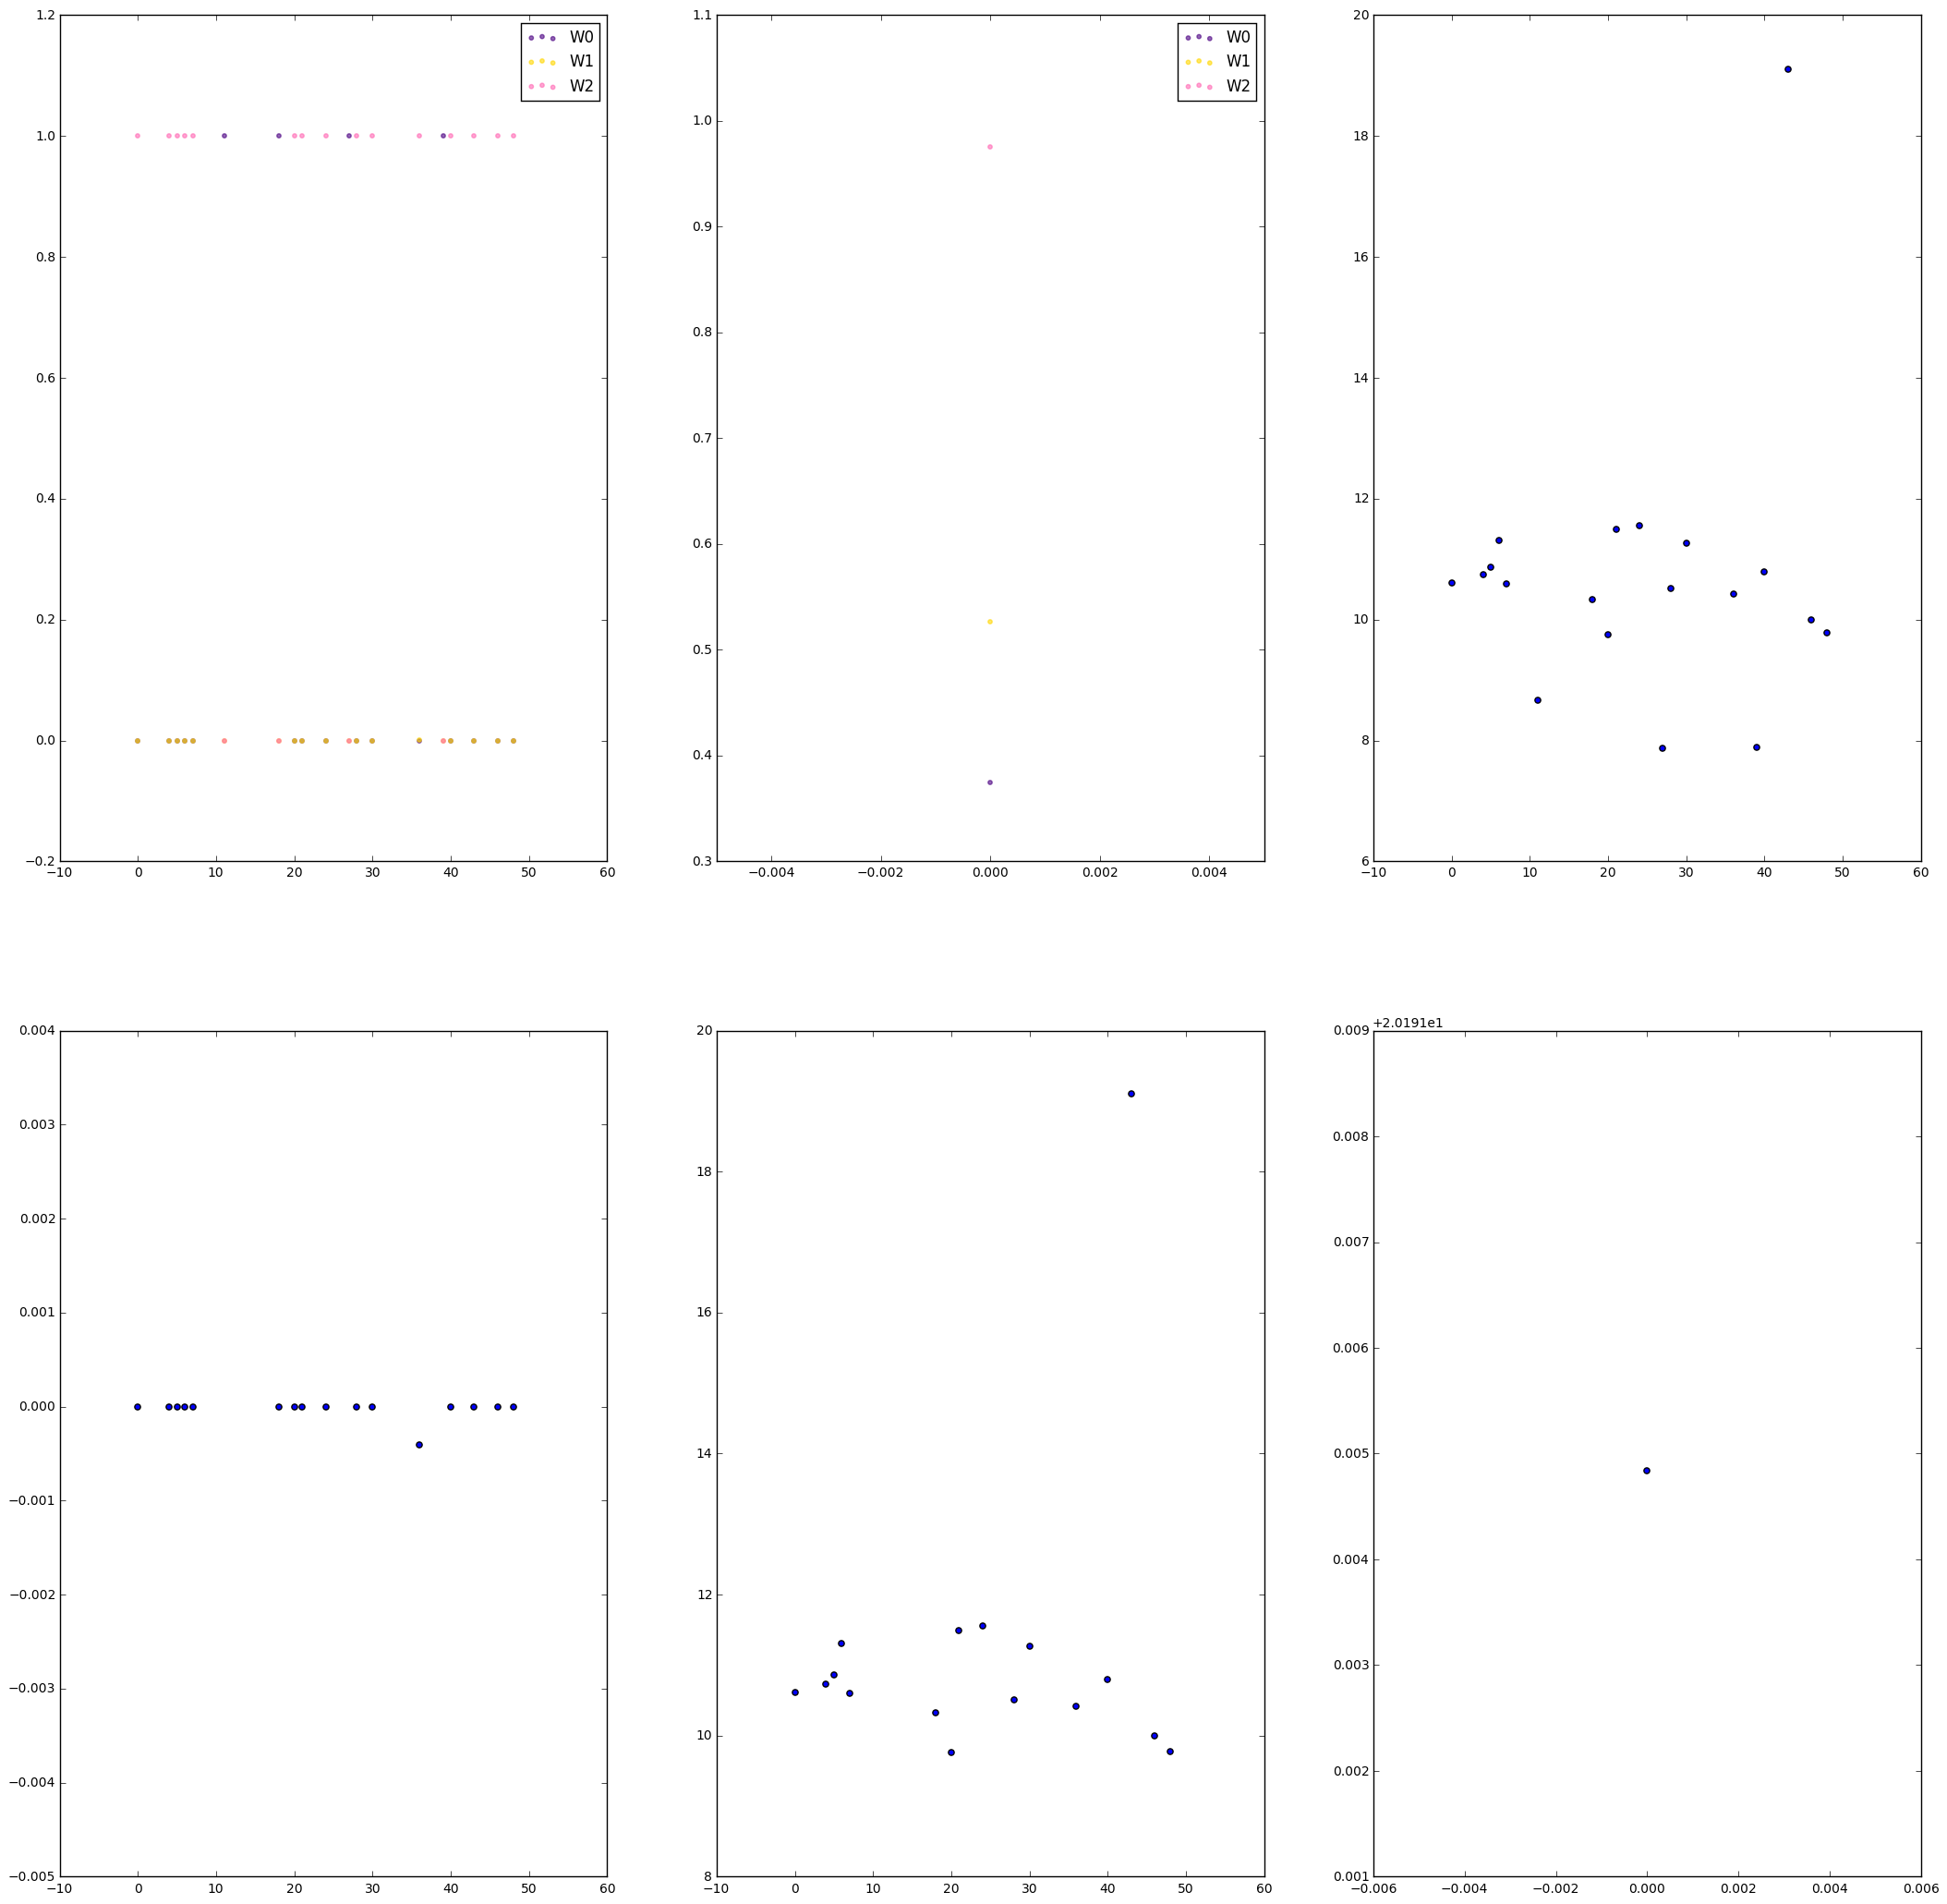

In [59]:
plt.subplot(231)
s=[]
for i in range(0,3):
    s.append(plt.scatter(range(0,150), lastw[:,i],color=colors_[i],alpha=0.6,s=10))
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.subplot(232)
s=[]
for i in range(0,3):
    s.append(plt.scatter(range(0,len(result[10][0:100,i])), result[10][0:100,i],color=colors_[i],alpha=0.6,s=10))
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend
plt.subplot(233)
plt.scatter(range(0,150),res)
plt.subplot(234)
plt.scatter(range(0,150),entropy)
plt.subplot(235)
plt.scatter(range(0,150),np.array(entropy)+np.array(res))
plt.subplot(236)
plt.scatter(range(0,len(resi)),np.array(resi)+np.array(entropyi))

In [28]:
data.values()

[array(['setosa', 'versicolor', 'virginica'], 
       dtype='|S10'), array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,

## using cvxpy to reslove the problem

In [5]:
from cvxpy import *
problist = []

for tem in X:
    x=tem.reshape(4,1)
    w = Variable(3)
    res = norm(x-P*vec(w))
    entropy = sum_entries(-entr(w))
    obj = res + 0.2*entropy
    constraints = [0 <= w, sum_entries(w)==1]
    print obj.curvature
    prob = Problem(Minimize(obj), constraints)
    prob.solve(verbose=True, solver=SCS)
    problist.append(prob)
    print prob.value

CONVEX
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 25, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 7, constraints m = 18
Cones:	primal zero / dual free vars: 1
	linear vars: 3
	soc vars: 5, soc blks: 1
	exp vars: 9, dual exp vars: 0
Setup time: 1.06e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  6.71e-04 
   100| 2.15e-03  1.13e-03  5.70e-03  1.19e-01  1.26e-01  1.89e-15  1.81e-03 
   200| 1.42e-03  1.07e-03  6.65e-03  1.30e-01  1

In [8]:
a= problist[0]
b = a.variables()[0]
b.value
resultw = [tem.variables()[0].value.tolist() for tem in problist]
resultw = np.array(resultw).reshape(150,3)


In [9]:
np.sum(np.abs(resultw.argmax(1)-iris.target))
P

array([[ 5.006,  5.936,  6.588],
       [ 3.418,  2.77 ,  2.974],
       [ 1.464,  4.26 ,  5.552],
       [ 0.244,  1.326,  2.026]])

In [11]:
entr(resultw).value

matrix([[ -3.91250727e-04,   5.20463045e-04,   5.94527718e-04],
        [  1.34922347e-02,   5.74887851e-02,   4.04570719e-04],
        [  3.22190217e-04,   6.13437727e-04,   8.33463522e-04],
        [  1.08986652e-02,   5.02972045e-02,   2.42218557e-04],
        [ -9.32606632e-04,   4.10964431e-04,   6.27938232e-04],
        [  7.88337985e-02,   2.20002611e-02,   1.98636545e-01],
        [  2.92806201e-04,   4.64500652e-04,             -inf],
        [  1.09710943e-02,   4.33953431e-02,   1.81577052e-03],
        [  2.08157425e-03,   1.48973216e-02,             -inf],
        [  1.96167881e-02,   7.63765013e-02,   4.03548709e-04],
        [  3.41798692e-02,   2.48907021e-02,   1.04580521e-01],
        [  2.40120957e-02,   8.85009428e-02,   2.46054492e-03],
        [  3.47101864e-03,   1.78728511e-02,   7.62490496e-05],
        [  3.32027889e-05,   1.37863987e-04,   1.60627318e-04],
        [  1.35463273e-02,   1.38204573e-02,   5.11595778e-02],
        [  6.13017065e-02,   1.96377202e

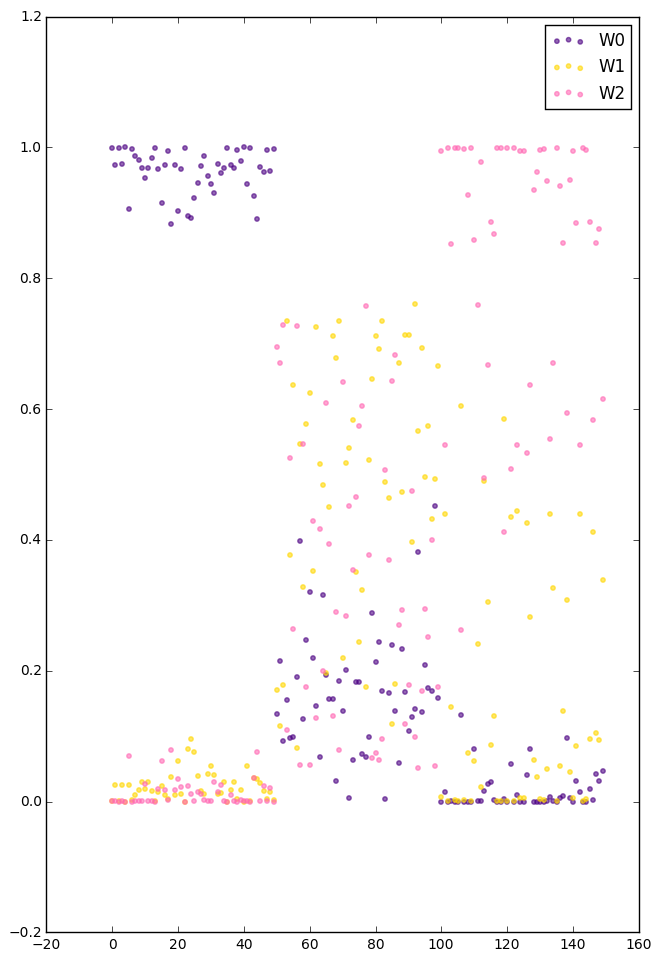

In [44]:
plt.subplot(231)
s=[]
for i in range(0,3):
    s.append(plt.scatter(range(0,150), resultw[:,i],color=colors_[i],alpha=0.6,s=10))
plt.legend(s, ('W%d'%temp for temp in range(0,samples)), 'best', numpoints=1)# make legend

In [13]:
import scipy
a=np.array([0.1]*10)
-scipy.stats.entropy(a)*1797

-4137.7454121103001